In [0]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

In [0]:
from google.colab import files

In [3]:
baixar= files.upload()

Saving comp_bikes_mod.csv to comp_bikes_mod.csv


In [0]:
DataFrame= pd.read_csv('comp_bikes_mod.csv')

In [5]:
DataFrame.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,NaN,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


## Descobrindo Informações do DataFrame

In [6]:
DataFrame.info() #Tem apenas uma coluna object e tem a mesma quantidade de linhas com NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15641 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      15641 non-null  float64
 3   yr          15641 non-null  float64
 4   mnth        15641 non-null  float64
 5   hr          15641 non-null  float64
 6   holiday     15641 non-null  float64
 7   weekday     15641 non-null  float64
 8   workingday  15641 non-null  float64
 9   weathersit  15641 non-null  float64
 10  temp        15641 non-null  float64
 11  atemp       15641 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   15641 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  15641 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


In [7]:
DataFrame.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000
mean,8676.513842,2.503420,0.501758,6.536091,11.521258,0.028131,2.999233,0.682118,1.423950,0.497062,0.476281,0.627579,0.189247,35.583147,153.644972,189.919826
std,5010.773755,1.107636,0.500013,3.441490,6.917606,0.165353,2.005300,0.465668,0.638982,0.192451,0.172520,0.192893,0.122188,49.226455,151.750573,181.972508
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4335.000000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8678.000000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.164200,17.000000,115.000000,142.000000
75%,13005.000000,3.000000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17377.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [8]:
DataFrame.shape

(17379, 17)

# Utilizando o dataset com os valores de NaN substituido pela média

In [9]:
df_media= DataFrame.fillna(DataFrame.mean(), axis=0)
df_media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      17379 non-null  float64
 3   yr          17379 non-null  float64
 4   mnth        17379 non-null  float64
 5   hr          17379 non-null  float64
 6   holiday     17379 non-null  float64
 7   weekday     17379 non-null  float64
 8   workingday  17379 non-null  float64
 9   weathersit  17379 non-null  float64
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  float64
 15  registered  17379 non-null  float64
 16  cnt         17379 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


In [0]:
x_media= df_media.loc[:, ['hum', 'casual']].values
y_media= df_media['cnt'].values

Utilizando a método de regressão linear

In [0]:
reg= LinearRegression()
regressao= reg.fit(x_media, y_media)

In [0]:
previsao= reg.predict(x_media)

In [13]:
r_2= r2_score(y_media, previsao)
print(f'Coeficiente de Determinacao: {r_2}')

Coeficiente de Determinacao: 0.40561165206692495


Utilizando método de árvore de decisão

In [0]:
tree= DecisionTreeRegressor()

In [0]:
model_tree= tree.fit(x_media, y_media)

In [0]:
previsao_tree= tree.predict(x_media)

In [17]:
r_2_tree= r2_score(y_media, previsao_tree)
print(f'Coeficiente de Determinacao: {r_2_tree}')

Coeficiente de Determinacao: 0.6973174287156154


# Utilizando o datasset com os valores NaN removidos

In [18]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15641 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      15641 non-null  float64
 3   yr          15641 non-null  float64
 4   mnth        15641 non-null  float64
 5   hr          15641 non-null  float64
 6   holiday     15641 non-null  float64
 7   weekday     15641 non-null  float64
 8   workingday  15641 non-null  float64
 9   weathersit  15641 non-null  float64
 10  temp        15641 non-null  float64
 11  atemp       15641 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   15641 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  15641 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


In [29]:
df_removidos= DataFrame.dropna(axis=0, subset=['dteday'])
df_removidos.info() #Faz sentido as outras colunas estarem com um menor valor de non-null, pois nem todas non-null daquela coluna foram retiradas.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15641 entries, 1 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     14060 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      14061 non-null  float64
 3   yr          14076 non-null  float64
 4   mnth        14062 non-null  float64
 5   hr          14068 non-null  float64
 6   holiday     14076 non-null  float64
 7   weekday     14078 non-null  float64
 8   workingday  14097 non-null  float64
 9   weathersit  14078 non-null  float64
 10  temp        14066 non-null  float64
 11  atemp       14076 non-null  float64
 12  hum         14070 non-null  float64
 13  windspeed   14082 non-null  float64
 14  casual      14071 non-null  float64
 15  registered  14090 non-null  float64
 16  cnt         14079 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.1+ MB


In [30]:
df_removidos.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,14060.000000,14061.000000,14076.000000,14062.000000,14068.000000,14076.000000,14078.000000,14097.000000,14078.000000,14066.000000,14076.000000,14070.000000,14082.000000,14071.000000,14090.000000,14079.000000
mean,8679.717496,2.507930,0.501563,6.542810,11.486779,0.027707,3.006535,0.683053,1.422432,0.496926,0.476055,0.627357,0.189552,35.416317,153.280625,189.165850
std,5015.960092,1.110674,0.500015,3.443693,6.915101,0.164137,2.002829,0.465303,0.638937,0.192971,0.172827,0.192863,0.122309,48.770799,151.317869,181.223589
min,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4336.250000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8677.500000,3.000000,1.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.164200,17.000000,115.000000,142.000000
75%,13024.250000,3.000000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,219.000000,280.000000
max,17376.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [31]:
correlacao= df_removidos.corr()
correlacao[['season', 'temp', 'atemp', 'hum', 'windspeed']]

,season,temp,atemp,hum,windspeed
instant,0.407970,0.141681,0.141808,0.007919,-0.072738
season,1.000000,0.311273,0.319559,0.146984,-0.149802
yr,-0.005610,0.040857,0.037290,-0.082335,-0.010422
mnth,0.830177,0.202203,0.210337,0.158109,-0.126643
hr,-0.004903,0.142102,0.136946,-0.277403,0.140474
holiday,-0.006846,-0.031273,-0.037606,-0.008809,0.008267
weekday,0.005788,-0.004478,-0.011512,-0.035510,0.011014
workingday,0.011555,0.053113,0.055287,0.017469,-0.010926
weathersit,-0.013153,-0.101245,-0.105254,0.418574,0.025729
temp,0.311273,1.000000,0.988102,-0.069887,-0.016022


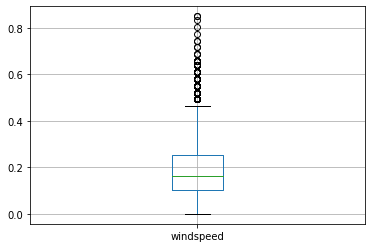

In [32]:
box= df_removidos.boxplot(['windspeed'])
box #Existe possíveis outliers e estão fora dos limites do boxplot

In [0]:
df_removidos= pd.get_dummies(df_removidos, columns=['season'])

In [36]:
df_removidos.head()

,instant,dteday,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_1.0,season_2.0,season_3.0,season_4.0
1,2.0,2011-01-01,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0,1,0,0,0
2,3.0,2011-01-01,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0,1,0,0,0
3,4.0,2011-01-01,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0,1,0,0,0
4,5.0,2011-01-01,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0,1,0,0,0
5,6.0,2011-01-01,0.0,1.0,5.0,0.0,6.0,0.0,2.0,0.24,0.2576,0.75,0.0896,0.0,1.0,1.0,1,0,0,0


In [46]:
df_removidos.loc[:, ['dteday']]

,dteday
1,2011-01-01
2,2011-01-01
3,2011-01-01
4,2011-01-01
5,2011-01-01
...,...
17373,2012-12-31
17374,2012-12-31
17375,2012-12-31
17377,2012-12-31
